In [93]:
import pandas as pd
import numpy as np

# Importing the Dataset

In [94]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [95]:
data=data.drop(columns='PassengerId',axis=1)

PassengerId it is of no use because it is in sequence so it is not having relation with label

In [96]:
data.shape

(891, 11)

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


# Checking Null Values in DataFrame

In [98]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [99]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [100]:
data.loc[data['Embarked'].isna()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


We can treat null values in Embarked features by using mode methord 
 Because it is having Categorical Data

In [101]:
data.loc[data['Age'].isna()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


We can treat null values in Age features by using mean methord Because it is having continuous Data

In [102]:
data.loc[data['Cabin'].isna()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
884,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


But We are not able to treat Cabin features because it is having alot NaN present in Data so we are droping this column

In [104]:
data=data.drop(columns=['Cabin'],axis=1)

KeyError: "['Cabin'] not found in axis"

There are null values present in Age and Embarked columns 

Treating Null values by using Mean,Median and Mode

In [105]:
data['Age']=data['Age'].fillna(data['Age'].mean())
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])

In [106]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

Now there is no null values are present in Dataset so we can proceed


Checking for Any duplicates columns  are present or not

In [107]:
data.drop_duplicates()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In the Above Dataset the target variable is to Predict person is Survived or not

Checking Datatypes of the columns

In [108]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Embarked     object
dtype: object

Using encoding technique we are going to convert string data into numerical one

In [109]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [110]:
for i in data.columns:
    if data[i].dtypes=='object':
        data[i]=enc.fit_transform(data[i])

In [111]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,108,1,22.000000,1,0,523,7.2500,2
1,1,1,190,0,38.000000,1,0,596,71.2833,0
2,1,3,353,0,26.000000,0,0,669,7.9250,2
3,1,1,272,0,35.000000,1,0,49,53.1000,2
4,0,3,15,1,35.000000,0,0,472,8.0500,2
...,...,...,...,...,...,...,...,...,...,...
886,0,2,548,1,27.000000,0,0,101,13.0000,2
887,1,1,303,0,19.000000,0,0,14,30.0000,2
888,0,3,413,0,29.699118,1,2,675,23.4500,2
889,1,1,81,1,26.000000,0,0,8,30.0000,0


Making DataFrame for nominal data

In [114]:
df_visualization_nominal=data[['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked']].copy()

In [115]:
df_visualization_nominal.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

# Visualization of Data

0    549
1    342
Name: Survived, dtype: int64


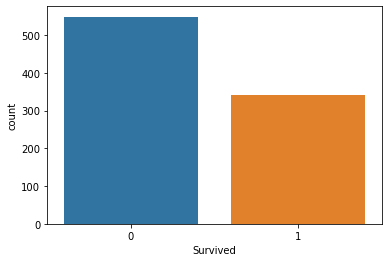

In [121]:
ax=sns.countplot(x='Survived',data=df_visualization_nominal)
print(df_visualization_nominal['Survived'].value_counts())

3    491
1    216
2    184
Name: Pclass, dtype: int64


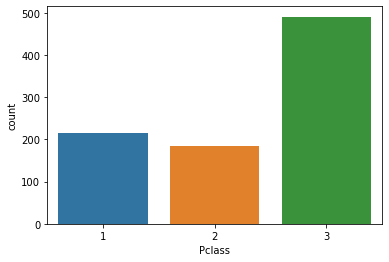

In [118]:
ax=sns.countplot(x='Pclass',data=df_visualization_nominal)
print(df_visualization_nominal['Pclass'].value_counts())

1    577
0    314
Name: Sex, dtype: int64


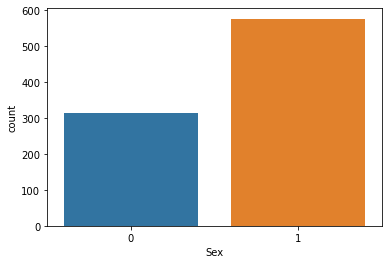

In [120]:
ax=sns.countplot(x='Sex',data=df_visualization_nominal)
print(df_visualization_nominal['Sex'].value_counts())

In [132]:
df_visualization_ordinal=data[['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked']].copy()

In [133]:
df_visualization_ordinal.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


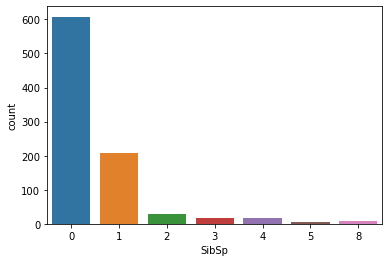

In [134]:
ax=sns.countplot(x='SibSp',data=df_visualization_ordinal)
print(df_visualization_ordinal['SibSp'].value_counts())

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


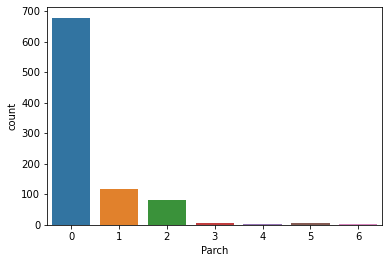

In [135]:
ax=sns.countplot(x='Parch',data=df_visualization_ordinal)
print(df_visualization_ordinal['Parch'].value_counts())

2    646
0    168
1     77
Name: Embarked, dtype: int64


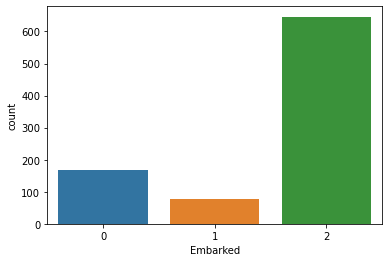

In [126]:
ax=sns.countplot(x='Embarked',data=df_visualization_nominal)
print(df_visualization_nominal['Embarked'].value_counts())

In [128]:
df_visualization_continuous=data[['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked']].copy()

In [129]:
df_visualization_continuous.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

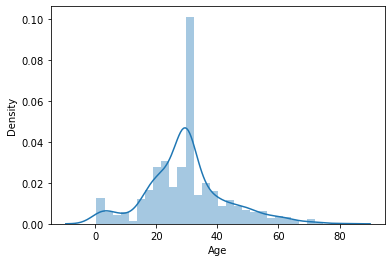

In [130]:
sns.distplot(df_visualization_continuous['Age'],kde=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

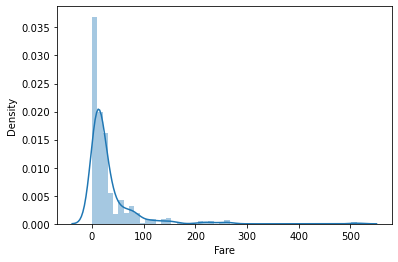

In [131]:
sns.distplot(df_visualization_continuous['Fare'],kde=True)

In [72]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

In [73]:
data.dtypes

Survived      int64
Pclass        int64
Name          int32
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Ticket        int32
Fare        float64
Embarked      int32
dtype: object

# Descriptive Analysis

We see for Continuous Data

In [74]:
data.describe()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,445.000000,0.647587,29.699118,0.523008,0.381594,338.528620,32.204208,1.536476
std,0.486592,0.836071,257.353842,0.477990,13.002015,1.102743,0.806057,200.850657,49.693429,0.791503
min,0.000000,1.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,222.500000,0.000000,22.000000,0.000000,0.000000,158.500000,7.910400,1.000000
50%,0.000000,3.000000,445.000000,1.000000,29.699118,0.000000,0.000000,337.000000,14.454200,2.000000
75%,1.000000,3.000000,667.500000,1.000000,35.000000,1.000000,0.000000,519.500000,31.000000,2.000000
max,1.000000,3.000000,890.000000,1.000000,80.000000,8.000000,6.000000,680.000000,512.329200,2.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

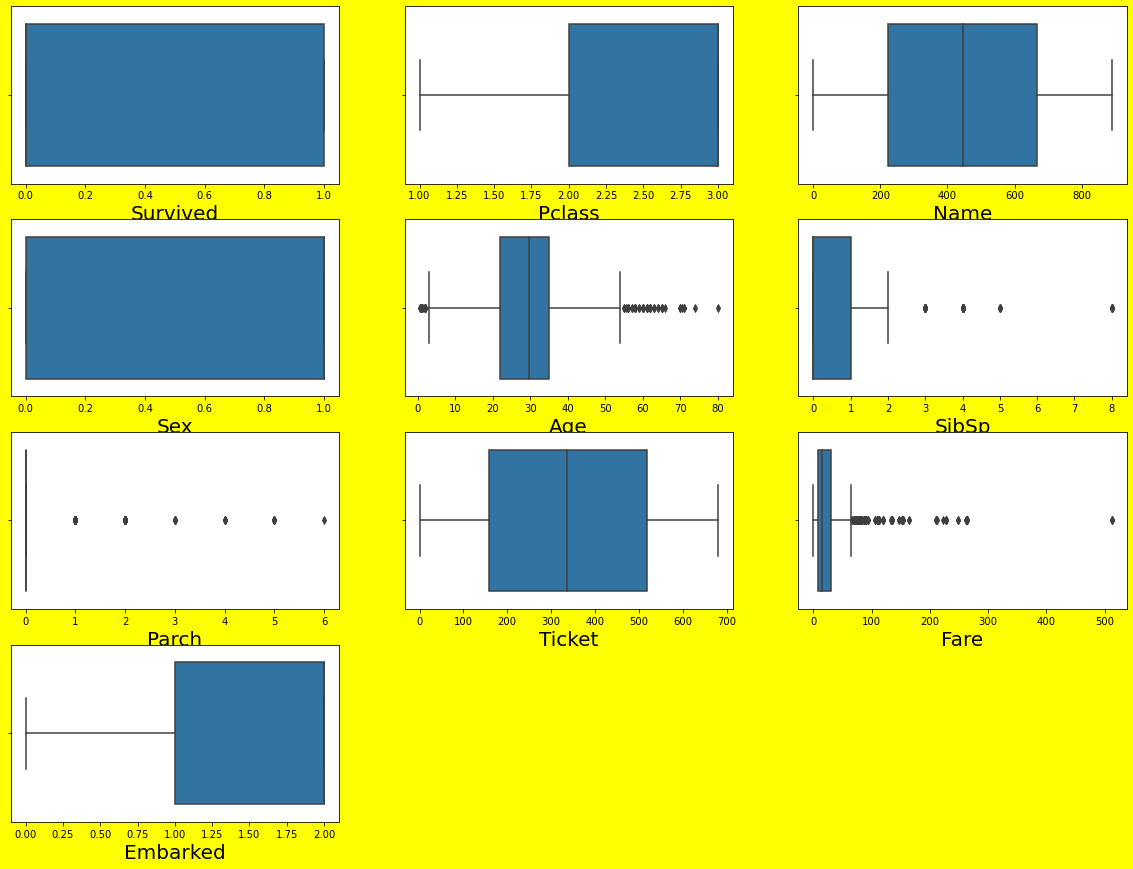

In [84]:
plt.figure(figsize=(20,15),facecolor='yellow')
plotnumber=1
for column in data:
    if plotnumber<=10:
        ax=plt.subplot(4,3,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1    
plt.show() 

Treating Outliers by using Z score methord

In [85]:
from scipy.stats import zscore
z=np.abs(zscore(data))
print(np.where(z>3))
df_new=data[(z<3).all(axis=1)]
df_new

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
       119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
       299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
       527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
       689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
       824, 846, 850, 851, 858, 863, 885], dtype=int64), array([6, 5, 6, 8, 5, 5, 5, 5, 6, 8, 4, 4, 8, 5, 5, 5, 6, 5, 5, 5, 5, 5,
       8, 5, 5, 5, 8, 8, 5, 8, 6, 8, 8, 5, 6, 6, 8, 5, 4, 8, 5, 5, 8, 6,
       6, 4, 6, 4, 6, 8, 5, 5, 8, 8, 8, 8, 6, 8, 8, 4, 6, 8, 5, 5, 5, 5,
       5, 5, 4, 6, 5, 6], dtype=int64))


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,108,1,22.000000,1,0,523,7.2500,2
1,1,1,190,0,38.000000,1,0,596,71.2833,0
2,1,3,353,0,26.000000,0,0,669,7.9250,2
3,1,1,272,0,35.000000,1,0,49,53.1000,2
4,0,3,15,1,35.000000,0,0,472,8.0500,2
...,...,...,...,...,...,...,...,...,...,...
886,0,2,548,1,27.000000,0,0,101,13.0000,2
887,1,1,303,0,19.000000,0,0,14,30.0000,2
888,0,3,413,0,29.699118,1,2,675,23.4500,2
889,1,1,81,1,26.000000,0,0,8,30.0000,0


In [136]:
Data_loss=((891-820)/891)*100
Data_loss

7.968574635241302

Correlation between features and label

In [75]:
data.corr()['Survived'].sort_values()

Sex        -0.543351
Pclass     -0.338481
Embarked   -0.167675
Ticket     -0.164549
Age        -0.069809
Name       -0.057343
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Survived    1.000000
Name: Survived, dtype: float64

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

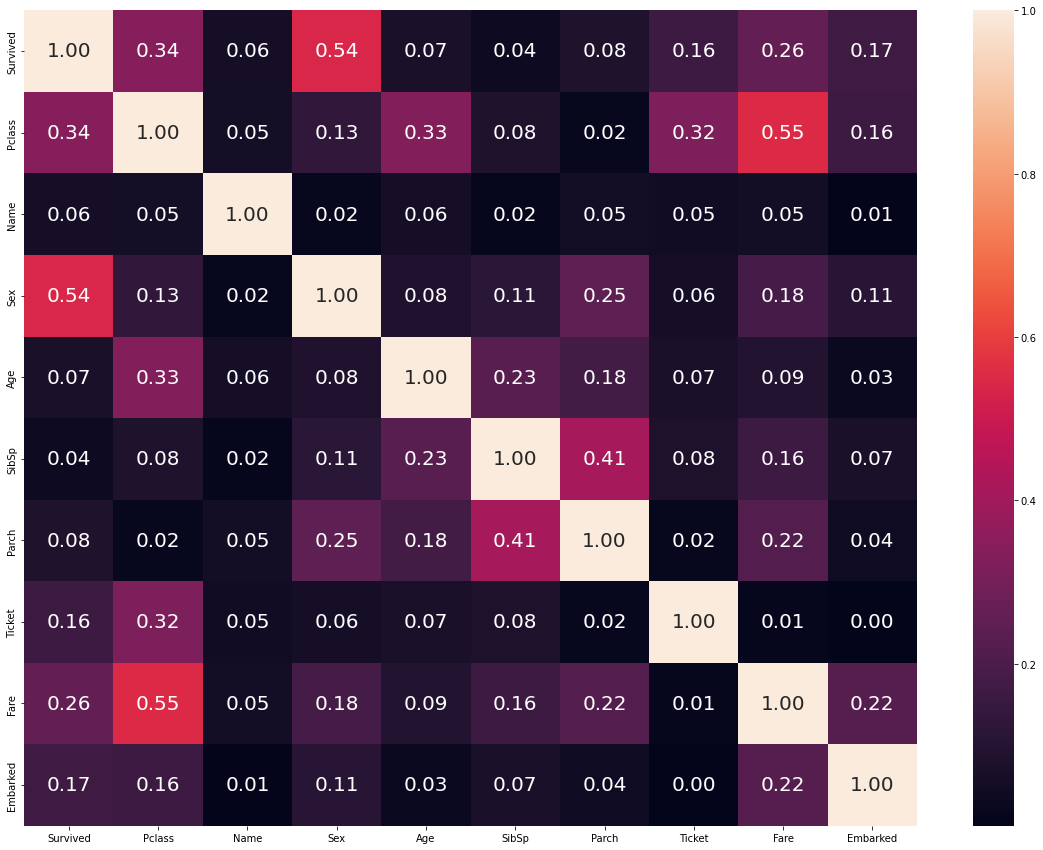

In [78]:
df_corr=data.corr().abs()
plt.figure(figsize=(20,15))
sns.heatmap(df_corr,annot=True,annot_kws={'size':20},fmt='.2f')
plt.show()

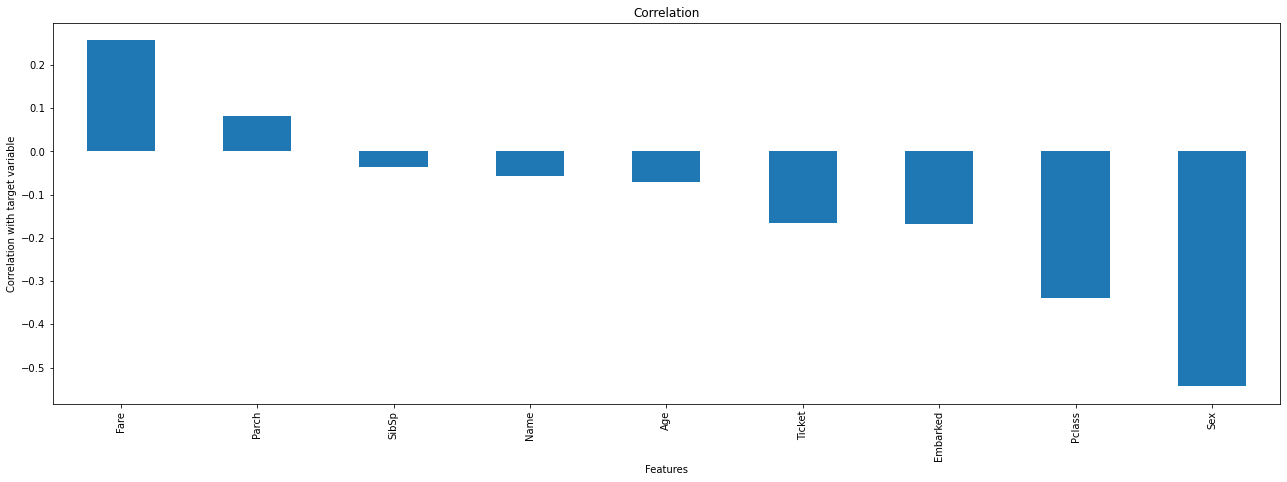

In [91]:
plt.figure(figsize=(22,7))
data.corr()['Survived'].sort_values(ascending=False).drop(['Survived']).plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Correlation with target variable')
plt.title('Correlation')
plt.show()

In [89]:
data.skew().sort_values()

Embarked   -1.264823
Pclass     -0.630548
Sex        -0.618921
Name        0.000000
Ticket      0.000246
Age         0.434488
Survived    0.478523
Parch       2.749117
SibSp       3.695352
Fare        4.787317
dtype: float64

keeping +/-0.5 as the range for skewness but there are columns those are lying beyond the range of skewness so we have to treat them by using Log Transform

# Separating Columns into Feature And Target

In [137]:
x=df_new.drop(columns='Survived')
y=df_new['Survived']

In [138]:
from sklearn.preprocessing import power_transform
x=power_transform(x)

In [139]:
x

array([[ 0.87283049, -1.39782963,  0.72203588, ...,  0.93404121,
        -0.83470177,  0.60778719],
       [-1.47067587, -0.9803203 , -1.38497273, ...,  1.21487665,
         1.55364494, -1.78767552],
       [ 0.87283049, -0.27824065, -1.38497273, ...,  1.48411797,
        -0.74331399,  0.60778719],
       ...,
       [ 0.87283049, -0.04483126, -1.38497273, ...,  1.50578647,
         0.39490799,  0.60778719],
       [-1.47067587, -1.55342366,  0.72203588, ..., -1.99052285,
         0.65432009, -1.78767552],
       [ 0.87283049, -0.84123462,  0.72203588, ...,  0.70528334,
        -0.76629016, -1.24967343]])

In [140]:
df_new.skew().sort_values()

Embarked   -1.277386
Sex        -0.664152
Pclass     -0.632242
Name        0.010147
Ticket      0.039240
Age         0.318314
Survived    0.450825
SibSp       1.979577
Parch       2.122629
Fare        2.318761
dtype: float64

In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report

In [142]:
lr=LogisticRegression()
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print('At Random_State',i,"The Model Perform Well")
        print('At Random_State',i)
        print('train accuracy is:-',round(accuracy_score(y_train,pred_train)*100,1))
        print('test accuracy is:-',round(accuracy_score(y_test,pred_test)*100,1),'\n\n')

At Random_State 57 The Model Perform Well
At Random_State 57
train accuracy is:- 80.5
test accuracy is:- 80.5 


At Random_State 164 The Model Perform Well
At Random_State 164
train accuracy is:- 80.5
test accuracy is:- 80.5 


At Random_State 235 The Model Perform Well
At Random_State 235
train accuracy is:- 79.9
test accuracy is:- 79.9 


At Random_State 342 The Model Perform Well
At Random_State 342
train accuracy is:- 81.1
test accuracy is:- 81.1 


At Random_State 369 The Model Perform Well
At Random_State 369
train accuracy is:- 80.5
test accuracy is:- 80.5 


At Random_State 387 The Model Perform Well
At Random_State 387
train accuracy is:- 81.1
test accuracy is:- 81.1 


At Random_State 470 The Model Perform Well
At Random_State 470
train accuracy is:- 80.5
test accuracy is:- 80.5 


At Random_State 600 The Model Perform Well
At Random_State 600
train accuracy is:- 80.5
test accuracy is:- 80.5 


At Random_State 715 The Model Perform Well
At Random_State 715
train accuracy is:-

In [143]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=387,test_size=0.20)

In [144]:
lr.fit(x_train,y_train)

LogisticRegression()

In [145]:
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)

In [146]:
accuracy_score(y_train,pred_train)*100

81.09756097560977

In [147]:
lss=accuracy_score(y_test,pred_test)*100
lss

81.09756097560977

In [148]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83        92
           1       0.80      0.76      0.78        72

    accuracy                           0.81       164
   macro avg       0.81      0.81      0.81       164
weighted avg       0.81      0.81      0.81       164



In [149]:
print(confusion_matrix(y_test,pred_test))

[[78 14]
 [17 55]]


In [150]:
from sklearn.model_selection import cross_val_score

In [153]:
for j in range(4,10):
    lsscore=cross_val_score(lr,x,y,cv=j)
    print(lsscore)
    lsc=lsscore.mean()
    print("At cv- ",j)
    print("Cross_val_score- ",lsc*100)
    print("Accuracy Score-",lss)
    print("/n")

[0.79512195 0.79512195 0.79512195 0.81463415]
At cv-  4
Cross_val_score-  80.0
Accuracy Score- 81.09756097560977
/n
[0.81097561 0.78658537 0.77439024 0.81097561 0.81097561]
At cv-  5
Cross_val_score-  79.8780487804878
Accuracy Score- 81.09756097560977
/n
[0.78832117 0.78832117 0.81751825 0.75912409 0.79411765 0.80882353]
At cv-  6
Cross_val_score-  79.27043080005726
Accuracy Score- 81.09756097560977
/n
[0.79661017 0.81196581 0.8034188  0.75213675 0.8034188  0.79487179
 0.83760684]
At cv-  7
Cross_val_score-  80.00041389871897
Accuracy Score- 81.09756097560977
/n
[0.78640777 0.7961165  0.80582524 0.7961165  0.80392157 0.78431373
 0.78431373 0.84313725]
At cv-  8
Cross_val_score-  80.001903674091
Accuracy Score- 81.09756097560977
/n
[0.80434783 0.81318681 0.78021978 0.85714286 0.75824176 0.76923077
 0.8021978  0.81318681 0.82417582]
At cv-  9
Cross_val_score-  80.24366937410416
Accuracy Score- 81.09756097560977
/n


In [154]:
lsscore_selected=cross_val_score(lr,x,y,cv=7).mean()
print("The CV Score is ",lsscore_selected)
print("The Accuracy Score is ",lss)

The CV Score is  0.8000041389871898
The Accuracy Score is  81.09756097560977


In [155]:
def model_selection(algorithm,x_train,x_test,y_train,y_test):
    algorithm.fit(x_train,y_train)
    model_1_pred_train=algorithm.predict(x_train)
    model_1_pred_test=algorithm.predict(x_test)
    print('train accuracy is:-',accuracy_score(y_train,model_1_pred_train))
    print('test accuracy is:-',accuracy_score(y_test,model_1_pred_test))
    print('classification_report for training is:-\n',classification_report(y_train,model_1_pred_train))
    print('classification_report for testing is:-\n',classification_report(y_test,model_1_pred_test))
    print('confusion_matrix is:-\n',confusion_matrix(y_test,model_1_pred_test))

In [156]:
model_selection(lr,x_train,x_test,y_train,y_test)

train accuracy is:- 0.8109756097560976
test accuracy is:- 0.8109756097560976
classification_report for training is:-
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       408
           1       0.77      0.71      0.74       248

    accuracy                           0.81       656
   macro avg       0.80      0.79      0.80       656
weighted avg       0.81      0.81      0.81       656

classification_report for testing is:-
               precision    recall  f1-score   support

           0       0.82      0.85      0.83        92
           1       0.80      0.76      0.78        72

    accuracy                           0.81       164
   macro avg       0.81      0.81      0.81       164
weighted avg       0.81      0.81      0.81       164

confusion_matrix is:-
 [[78 14]
 [17 55]]


In [157]:
from sklearn.metrics import roc_curve,auc

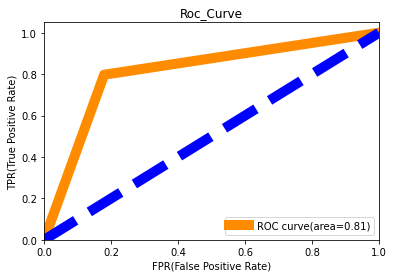

In [158]:
fpr,tpr,thresholds=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color="darkorange",lw=10,label='ROC curve(area=%0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='blue',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('FPR(False Positive Rate)')
plt.ylabel("TPR(True Positive Rate)")
plt.title("Roc_Curve")
plt.legend(loc='lower right')
plt.show()

In [159]:
import pickle
file='Diabetes'
pickle.dump(lr,open(file,'wb'))

In [160]:
load=pickle.load(open('Diabetes','rb'))
result=load.score(x_test,y_test)
print(result*100)

81.09756097560977


In [161]:
Conclusion=pd.DataFrame([load.predict(x_test)[:],y_test[:]],index=["Predicted","original"])

In [162]:
Conclusion

,0,1,2,3,4,5,6,7,8,9,...,154,155,156,157,158,159,160,161,162,163
Predicted,0,0,0,0,0,1,1,0,1,1,...,0,1,0,1,1,0,0,0,1,0
original,0,0,0,0,0,0,1,0,1,1,...,0,1,0,1,1,0,0,0,1,0
